# Artificial Neural Network


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.isnull().sum() #No null values or missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#Split the dataset into independent features (ie:X) and label (ie: Y)

X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [8]:
#creat dummy variables
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)


In [9]:
#concate the dataframes
X = pd.concat([X,geography,gender],axis=1)

In [10]:
#remove unnecessary columns
X= X.drop(['Geography','Gender'],axis=1)

In [11]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)


# feature scaling


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Define ANN Model

In [15]:
# Importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [16]:
#Initializing  the ANN
classifier = Sequential()

In [17]:
#adding the input layer and the first hidden layer
classifier.add(Dense(6, activation='relu', input_dim=11))
#adding second hidden layer
classifier.add(Dense(6, activation='relu'))
# classifier.add(Dense(15, activation='relu'))
#adding output layer
classifier.add(Dense(1, activation='sigmoid'))
                     

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [19]:
#complie the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# fit the model
history = classifier.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.33)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.7019 - accuracy: 0.5555 - val_loss: 0.5831 - val_accuracy: 0.7902
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5445 - accuracy: 0.7953 - val_loss: 0.5132 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.7962 - val_loss: 0.4904 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4840 - accuracy: 0.7960 - val_loss: 0.4742 - val_accuracy: 0.7974
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.8022 - val_loss: 0.4600 - val_accuracy: 0.8020
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4519 - accuracy: 0.8063 - val_loss: 0.4500 - val_accuracy: 0.8088
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4414 - accuracy: 0.8115 - val_loss: 0.4427 - val_accuracy: 0.8111

536/536 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8623 - val_loss: 0.3574 - val_accuracy: 0.8557
Epoch 57/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8617 - val_loss: 0.3570 - val_accuracy: 0.8561
Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8623 - val_loss: 0.3567 - val_accuracy: 0.8569
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8636 - val_loss: 0.3564 - val_accuracy: 0.8576
Epoch 60/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8623 - val_loss: 0.3560 - val_accuracy: 0.8569
Epoch 61/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8615 - val_loss: 0.3561 - val_accuracy: 0.8584
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8634 - val_loss: 0.3558 - val_accuracy: 0.8573
Epoch

In [29]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [30]:
# evaluate the model
loss, acc = classifier.evaluate(X_test, Y_test,verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.859


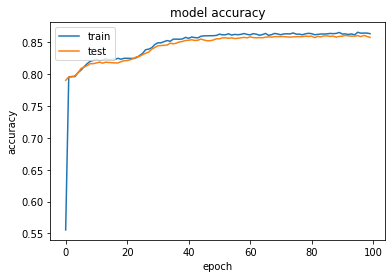

In [31]:
#summarize the history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

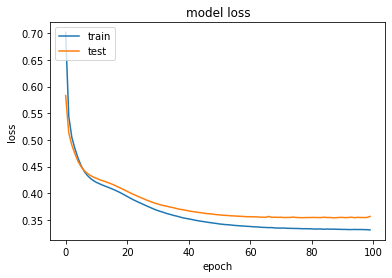

In [32]:
#summarize the history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [33]:
# Making the predictions and evaluating the model
Y_predict =classifier.predict(X_test)
Y_predict =( Y_predict>0.5)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)


In [35]:
cm

array([[1488,  107],
       [ 176,  229]], dtype=int64)

In [36]:
# Calculate the matrix
from sklearn.metrics import accuracy_score
score =  accuracy_score(Y_predict,Y_test)
print("accuracy of test data",score)

accuracy of test data 0.8585
